# Introduction

In [1]:
library(tidyverse)
library(data.table)
library(patchwork)

theme_custom <- theme_classic() +
                theme(## Axis labels
                      axis.text.x = element_text(size=18, family="Econ Sans Cnd light"),
                      axis.text.y = element_text(size=18, family="Econ Sans Cnd light"),
                      ## Title, subtitle, caption, legend
                      plot.title = element_text(size=22, face="bold", family="Econ Sans Cnd bold", 
                                                hjust = 0, vjust = 1, margin = margin(b = 10)),
                      plot.subtitle = element_text(size=18, family="Econ Sans Cnd regular",
                                                   hjust = 0),
                      plot.caption = element_text(size=12, face="bold", family="Econ Sans Cnd light", hjust=0, colour="#6F8793"),
                      legend.position = "top",
                      legend.text = element_text(size=15, hjust=0, vjust=.1),
                      legend.title = element_blank(),
                      ## y-axis lines
                      panel.grid.major.y = element_line(color="#6F8793"),
                      ## Background color
                      panel.background=element_rect(fill="#F3F0E0"),
                      plot.background=element_rect(fill="#F3F0E0"),
                      legend.background=element_rect(fill="#F3F0E0")
                     )

fig_size <- function(width=22, height=8){
    options(repr.plot.width=width, repr.plot.height=height)
}
fig_size()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘data.table’




The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




The following objects are masked from ‘package:dplyr’:

    between, first, last




The following object is masked from ‘package:purrr’:

    transpose




In [2]:
data <- read_csv("/kaggle/input/2024-venezuela-presidential-election-results/RESULTADOS_2024_CSV_V2.csv")

head(data, 5)
glimpse(data,2)
spec(data)

Rows: 25073 Columns: 21


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): EDO, MUN, PAR, URL
dbl (17): COD_EDO, COD_MUN, COD_PAR, CENTRO, MESA, VOTOS_VALIDOS, VOTOS_NULO...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


COD_EDO,EDO,COD_MUN,MUN,COD_PAR,PAR,CENTRO,MESA,VOTOS_VALIDOS,VOTOS_NULOS,⋯,NM,LM,JABE,JOBR,AE,CF,DC,EM,BERA,URL
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,DTTO. CAPITAL,1,MP. BLVNO LIBERTADOR,1,PQ. ALTAGRACIA,10101001,1,449,0,⋯,114,3,1,0,1,1,2,0,4,https://static.resultadosconvzla.com/408106_205969_0184Acta0184.jpg
1,DTTO. CAPITAL,1,MP. BLVNO LIBERTADOR,1,PQ. ALTAGRACIA,10101001,2,416,0,⋯,137,2,0,1,3,0,0,1,1,https://static.resultadosconvzla.com/408106_073085_0185Acta0185.jpg
1,DTTO. CAPITAL,1,MP. BLVNO LIBERTADOR,1,PQ. ALTAGRACIA,10101001,3,468,0,⋯,123,4,0,1,4,3,0,1,7,https://static.resultadosconvzla.com/408106_749435_0186Acta0186.jpg
1,DTTO. CAPITAL,1,MP. BLVNO LIBERTADOR,1,PQ. ALTAGRACIA,10101002,1,448,0,⋯,118,1,1,1,1,0,0,1,3,https://static.resultadosconvzla.com/408106_375657_0157Acta0157.jpg
1,DTTO. CAPITAL,1,MP. BLVNO LIBERTADOR,1,PQ. ALTAGRACIA,10101002,2,455,0,⋯,144,1,1,1,7,1,0,2,8,https://static.resultadosconvzla.com/408106_777262_0158Acta0158.jpg


Rows: 25,073
Columns: 21
$ COD_EDO       <dbl> …
$ EDO           <chr> …
$ COD_MUN       <dbl> …
$ MUN           <chr> …
$ COD_PAR       <dbl> …
$ PAR           <chr> …
$ CENTRO        <dbl> …
$ MESA          <dbl> …
$ VOTOS_VALIDOS <dbl> …
$ VOTOS_NULOS   <dbl> …
$ EG            <dbl> …
$ NM            <dbl> …
$ LM            <dbl> …
$ JABE          <dbl> …
$ JOBR          <dbl> …
$ AE            <dbl> …
$ CF            <dbl> …
$ DC            <dbl> …
$ EM            <dbl> …
$ BERA          <dbl> …
$ URL           <chr> …


cols(
  COD_EDO = col_double(),
  EDO = col_character(),
  COD_MUN = col_double(),
  MUN = col_character(),
  COD_PAR = col_double(),
  PAR = col_character(),
  CENTRO = col_double(),
  MESA = col_double(),
  VOTOS_VALIDOS = col_double(),
  VOTOS_NULOS = col_double(),
  EG = col_double(),
  NM = col_double(),
  LM = col_double(),
  JABE = col_double(),
  JOBR = col_double(),
  AE = col_double(),
  CF = col_double(),
  DC = col_double(),
  EM = col_double(),
  BERA = col_double(),
  URL = col_character()
)

In [3]:
data %>%
    is.na() %>%
    apply(2,sum) %>%
    data.frame() %>% 
    rename("NA_count"=".")

,NA_count
,<int>
COD_EDO,0
EDO,0
COD_MUN,0
MUN,0
COD_PAR,0
PAR,0
CENTRO,0
MESA,0
VOTOS_VALIDOS,0


In [4]:
dup_count <-
    data %>%
    select(!URL) %>%
    duplicated() %>%
    sum()
print(paste("Duplicate Count: ", dup_count, sep=""), quote=FALSE)

[1] Duplicate Count: 0


In [5]:
data <- 
    data %>%
    mutate("electoral_machine_ID" = paste(CENTRO, "_", MESA, sep=""),
           "municipality_ID" = paste(COD_EDO, "_", COD_MUN, sep="")
          ) %>%
    select(!URL)

# Data Analysis

In [6]:
head(data,2)

COD_EDO,EDO,COD_MUN,MUN,COD_PAR,PAR,CENTRO,MESA,VOTOS_VALIDOS,VOTOS_NULOS,⋯,LM,JABE,JOBR,AE,CF,DC,EM,BERA,electoral_machine_ID,municipality_ID
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,DTTO. CAPITAL,1,MP. BLVNO LIBERTADOR,1,PQ. ALTAGRACIA,10101001,1,449,0,⋯,3,1,0,1,1,2,0,4,10101001_1,1_1
1,DTTO. CAPITAL,1,MP. BLVNO LIBERTADOR,1,PQ. ALTAGRACIA,10101001,2,416,0,⋯,2,0,1,3,0,0,1,1,10101001_2,1_1


In [7]:
data %>% 
    group_by(CENTRO) %>%
    summarise("count"=n()) %>%
    arrange(desc(count)) %>%
    rename("top_10_voting_center_ID" = "CENTRO") %>%
    head(10)

top_10_voting_center_ID,count
<dbl>,<int>
71301010,15
130801006,12
131801021,11
60108019,10
71301008,10
130902022,10
131601041,10
131901003,10
210513012,10


In [8]:
num_df <- 
    data %>%
    select(where(is.numeric))

candidate_votes <- num_df[, 8:17]

candidate_votes_prop <- 
    candidate_votes %>%
    mutate(electoral_machine_num = 1:25073) %>%
    pivot_longer(cols=1:10,
                 names_to="candidate",
                 values_to="vote_count") %>%
    group_by(electoral_machine_num) %>%
    mutate("vote_prop" = vote_count/sum(vote_count)) 

head(candidate_votes_prop, 15)

electoral_machine_num,candidate,vote_count,vote_prop
<int>,<chr>,<dbl>,<dbl>
1,EG,323,0.719376392
1,NM,114,0.253897550
1,LM,3,0.006681514
1,JABE,1,0.002227171
1,JOBR,0,0.000000000
1,AE,1,0.002227171
1,CF,1,0.002227171
1,DC,2,0.004454343
1,EM,0,0.000000000


In [9]:
### Smoothed graph by using state
num_df <- 
    data %>%
    select(where(is.numeric))

## Appends state to df of votes
candidate_votes <- num_df[, 8:17]
candidate_votes <- cbind(candidate_votes, data$EDO)

candidate_votes_prop <- 
    candidate_votes %>%
    rename("state" = "data$EDO") %>%
    pivot_longer(cols=1:10,
                 names_to="candidate",
                 values_to="vote_count") %>%
    group_by(state) %>%
    mutate("vote_prop" = vote_count/sum(vote_count))

In [10]:
table <- 
    candidate_votes_prop %>%
    mutate(candidate = case_when(candidate=="EG"~"Edmundo Gonzalez    ",
                                 candidate=="NM"~"Nicolas Maduro    ",
                                 .default="Other    "
                                 )
          ) %>%
     mutate(state = str_to_title(tolower(state)),
           state = gsub("Edo. ", "", state),
           state = gsub("Edo.", "", state),
           state=factor(state)
          ) %>%
    group_by(state, candidate) %>%
    summarise(total_vote=sum(vote_count)) %>%
    mutate(vote_prop=total_vote/sum(total_vote)) 

head(table)

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


state,candidate,total_vote,vote_prop
<fct>,<chr>,<dbl>,<dbl>
Dtto. Capital,Edmundo Gonzalez,505956,0.64055036
Dtto. Capital,Nicolas Maduro,256288,0.32446571
Dtto. Capital,Other,27633,0.03498393
Amazonas,Edmundo Gonzalez,27219,0.59440514
Amazonas,Nicolas Maduro,17374,0.37941125
Amazonas,Other,1199,0.02618361


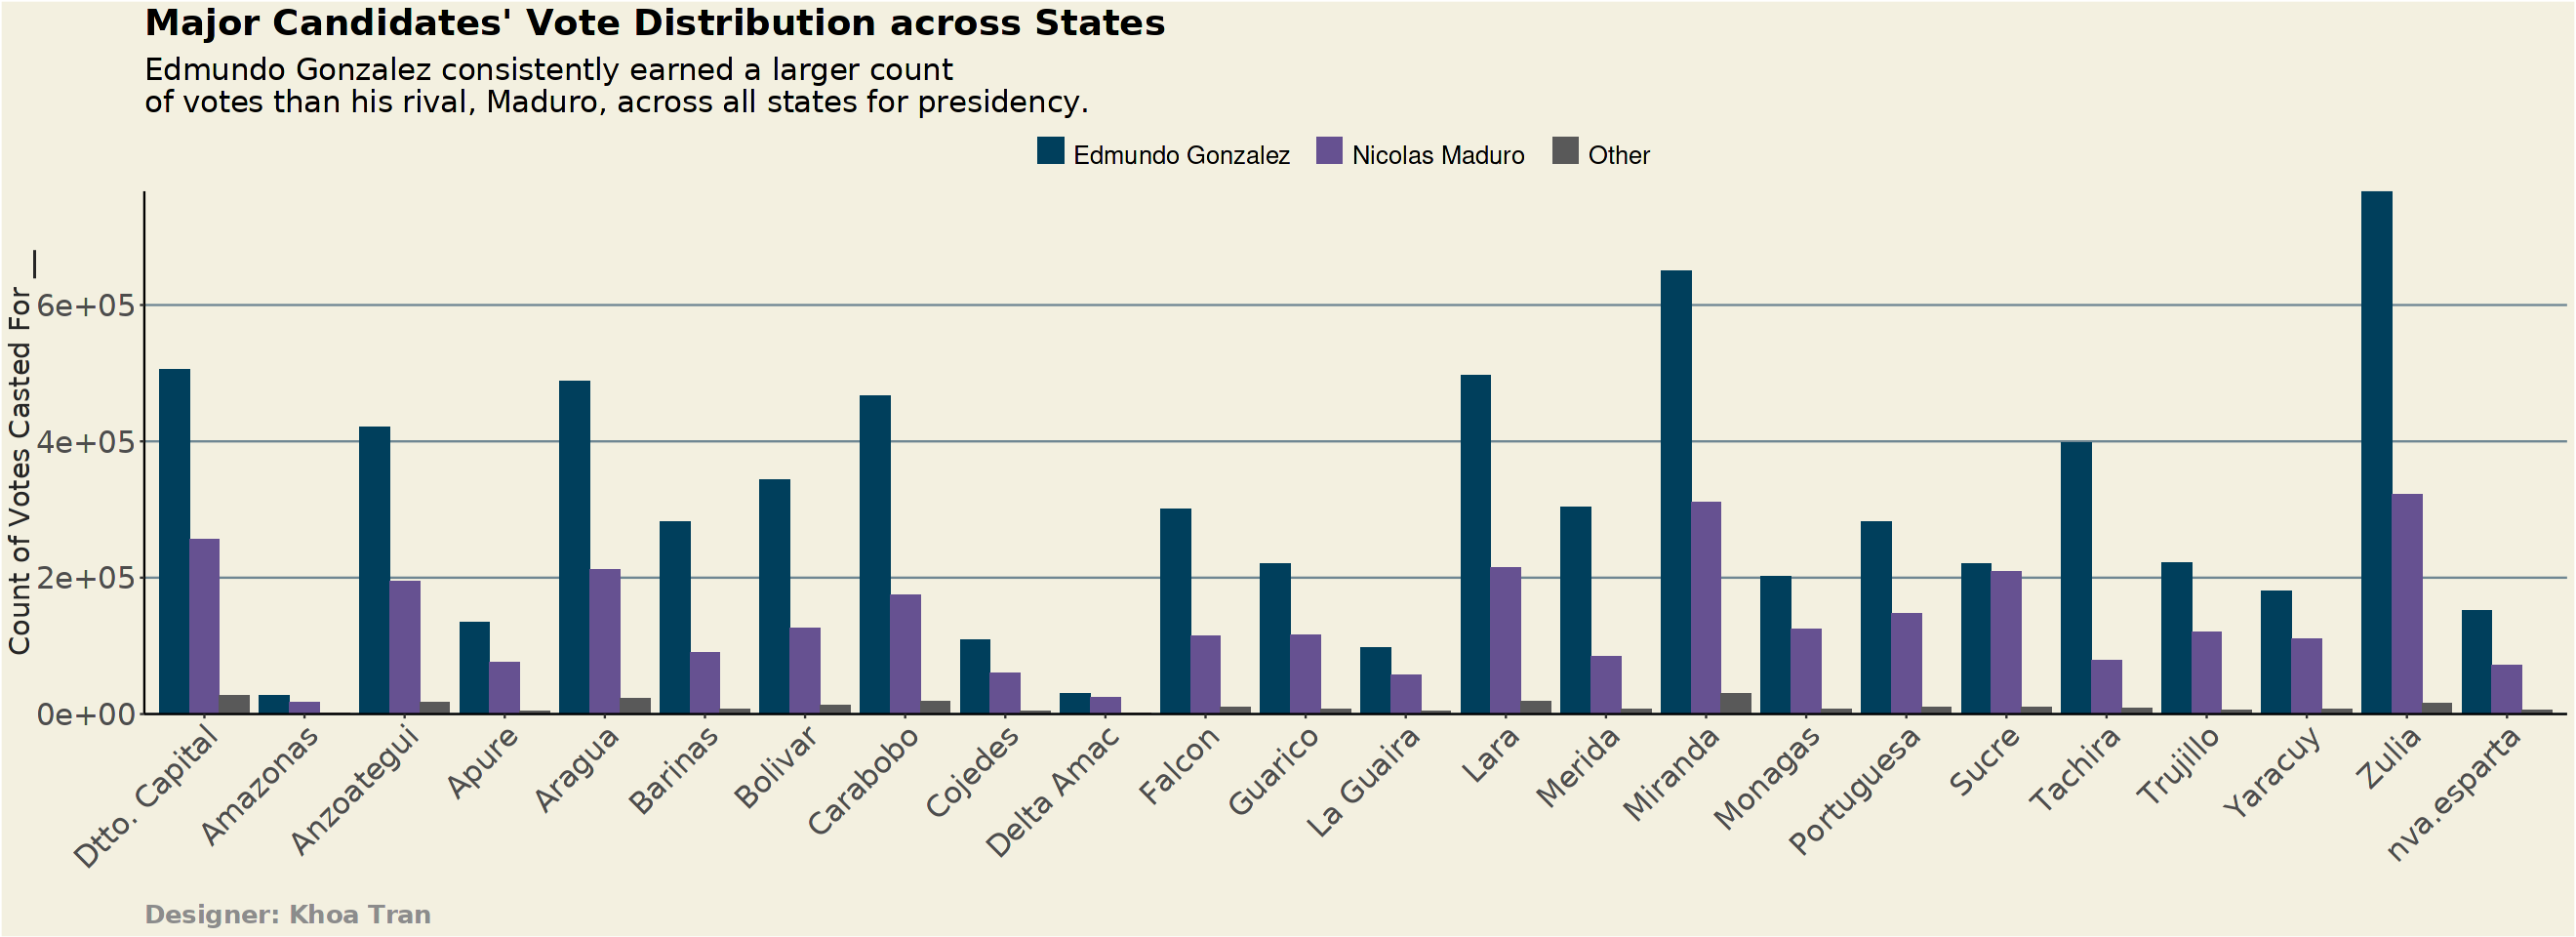

In [11]:
subtitle <- "Edmundo Gonzalez consistently earned a larger count
of votes than his rival, Maduro, across all states for presidency."

counts <- 
    table %>%
    ggplot(aes(x=state, y=total_vote, fill=candidate)) +
    geom_bar(stat="identity", position="dodge") +
    labs(title="Major Candidates' Vote Distribution across States",
         subtitle=subtitle,
         caption="Designer: Khoa Tran",
         x="",
         y="Count of Votes Casted For __"
        ) +
    theme_custom +
    theme(axis.title.y=element_text(size=17, family="Econ Sans Cnd light", colour="gray15"),
          plot.caption=element_text(size=15, color="gray55")
         ) +
    scale_fill_manual(values=c("Edmundo Gonzalez    "="#003f5c",
                               "Nicolas Maduro    "="#665191",
                               "Other    "="gray35"
                               )
                     ) +
    scale_x_discrete(guide=guide_axis(angle=45),
                    ) +
    scale_y_continuous(expand=c(0,0)
                      )

counts

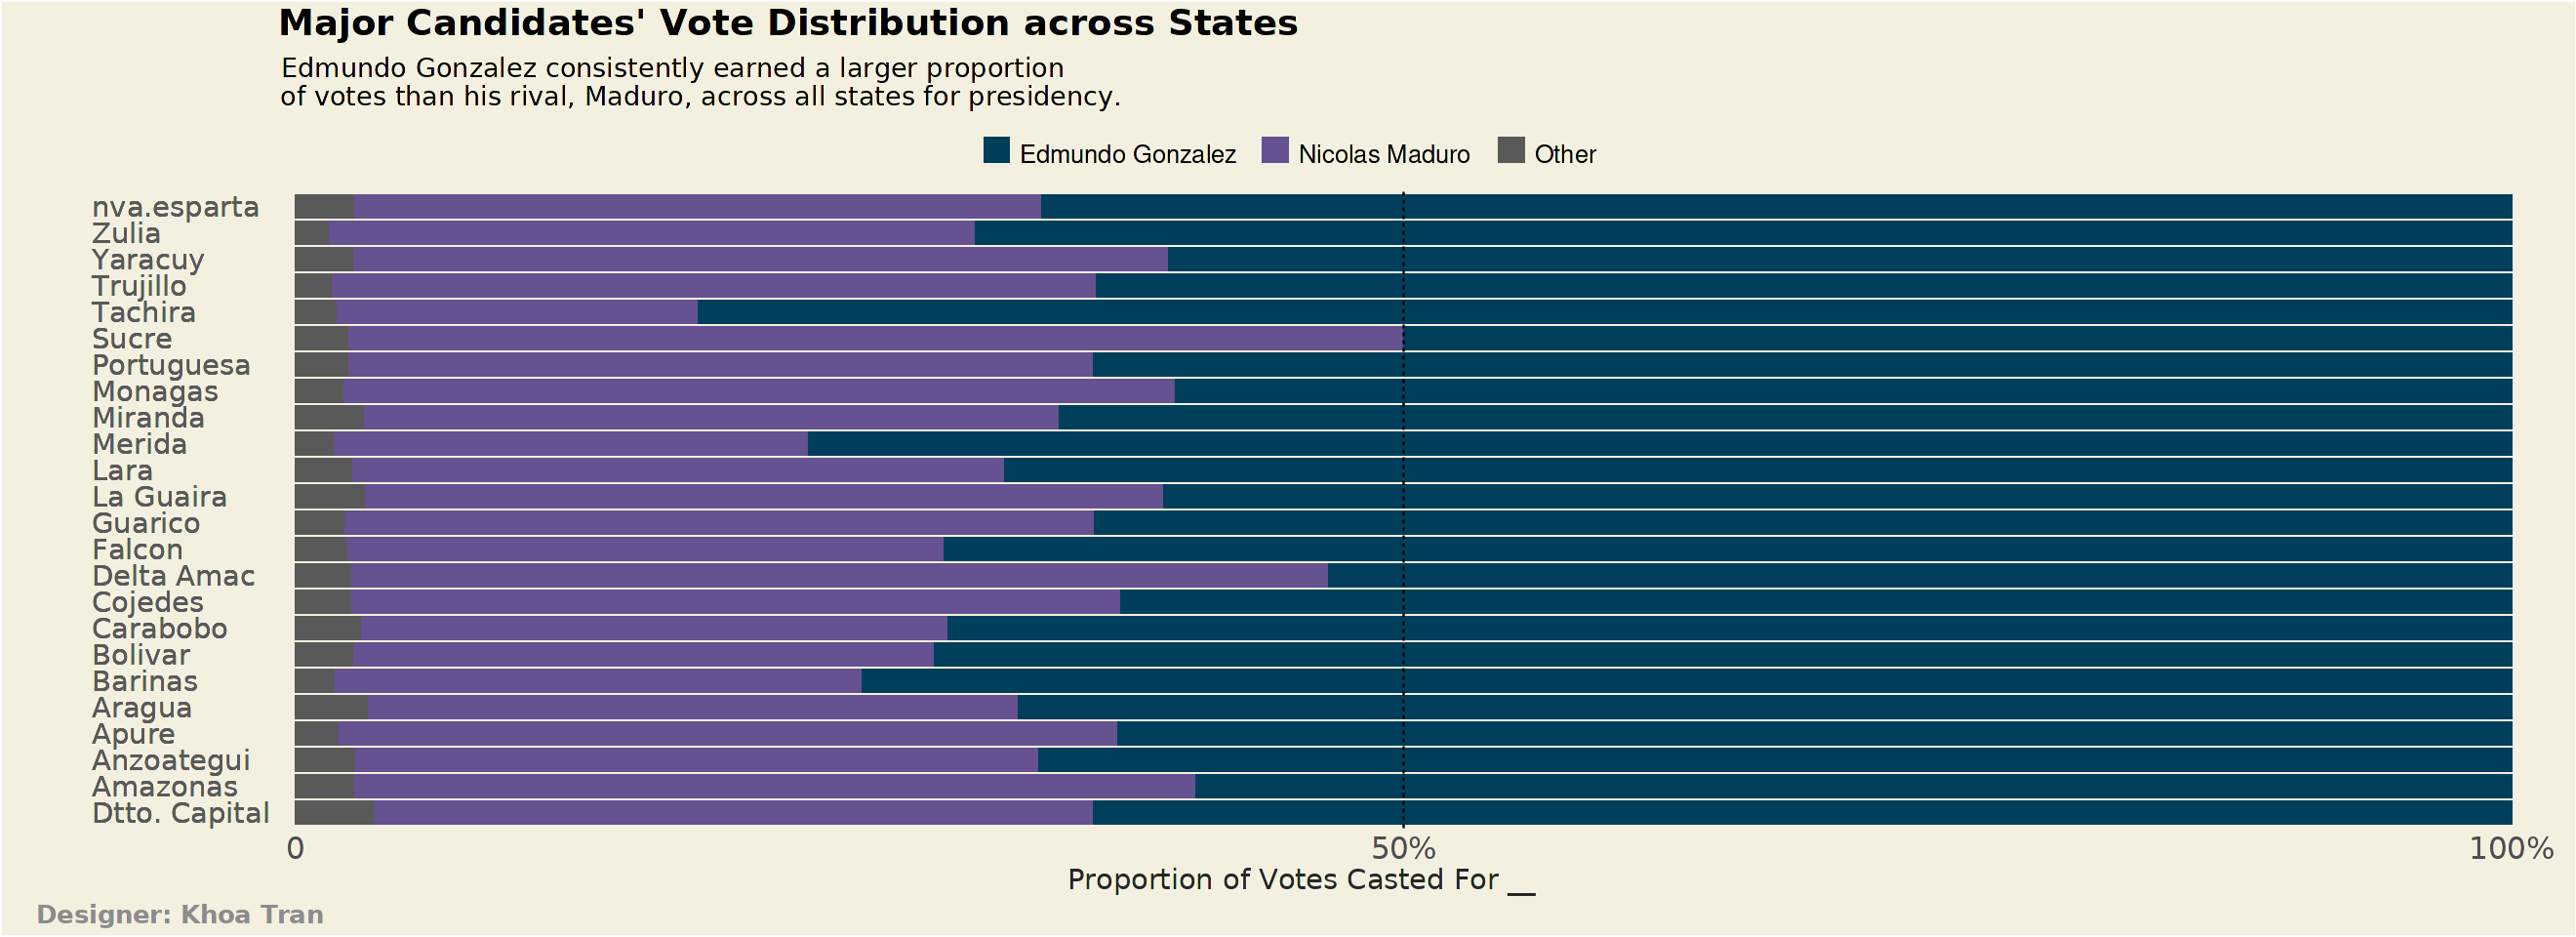

In [12]:
subtitle <- "Edmundo Gonzalez consistently earned a larger proportion
 of votes than his rival, Maduro, across all states for presidency."

props <- 
    table %>%
    ggplot(aes(x=vote_prop, y=state, fill=candidate)) +
    geom_bar(stat="identity") +
    geom_vline(xintercept=.5, linetype="dashed") +
    labs(title="Major Candidates' Vote Distribution across States",
         subtitle=subtitle,
         caption="Designer: Khoa Tran",
         y="",
         x="Proportion of Votes Casted For __"
        ) +
    theme_custom +
    theme(panel.grid.major.y=element_blank(),
          axis.ticks.y=element_blank(),
          axis.ticks.x=element_blank(),
          axis.line.y=element_blank(),
          axis.line.x=element_blank(),
          axis.title.x=element_text(size=17, family="Econ Sans Cnd light", colour="gray15"),
          axis.text.y=element_blank(),
          plot.title = element_text(size=22, face="bold", family="Econ Sans Cnd bold", 
                                    hjust = 0.16, vjust = 1, margin = margin(b = 10)),
          plot.subtitle = element_text(size=16, family="Econ Sans Cnd bold", 
                                       hjust = 0.14, vjust = 1, margin = margin(b = 10)),
          plot.caption=element_text(size=15, color="gray55")
         ) +
    scale_x_continuous(expand=c(0,0.025),
                       breaks=c(0,.5, 1),
                       labels=c("0", "50%", "100%")
                      ) +
    scale_fill_manual(values=c("Edmundo Gonzalez    "="#003f5c",
                               "Nicolas Maduro    "="#665191",
                               "Other    "="gray35"
                               )
                     ) +
    geom_text(aes(x=0, y=state, label=state),
              hjust=0,
              nudge_x=-.092,
              color="gray35",
              family = "Econ Sans Cnd regular",
              size = 6
              )

props